# Movie Dataset Exploratory Data Analysis


In this notebook, we will perform data analysis and visualisations of the most up to date (24/11/24) movies dataset. In the second notebook, we will try to build a ML model to predict whether a movie is going to perform well or not.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS

### Read Dataset and Data Cleaning

In [2]:
df = pd.read_csv('TMDB_movie_dataset_v11.csv')
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [3]:
df.shape

(1136234, 24)

In [4]:
df.isnull().sum()

id                            0
title                        13
vote_average                  0
vote_count                    0
status                        0
release_date             186790
revenue                       0
runtime                       0
adult                         0
backdrop_path            834669
budget                        0
homepage                1015842
imdb_id                  533661
original_language             0
original_title               13
overview                 230397
popularity                    0
poster_path              358395
tagline                  976934
genres                   455409
production_companies     623441
production_countries     503305
spoken_languages         484172
keywords                 828291
dtype: int64

In [5]:
columns = ['backdrop_path', 'homepage', 'imdb_id', 'poster_path', 'tagline', 'spoken_languages', 'production_companies', 'production_countries', 'original_title']
df.drop(columns=columns, inplace=True)

In [6]:
df.isnull().sum()

id                        0
title                    13
vote_average              0
vote_count                0
status                    0
release_date         186790
revenue                   0
runtime                   0
adult                     0
budget                    0
original_language         0
overview             230397
popularity                0
genres               455409
keywords             828291
dtype: int64

In [7]:
# Dropping rows where 'title' and 'keywords' is null

df_cleaned = df.dropna(subset=['title', 'keywords', 'release_date', 'overview', 'genres'])

In [8]:
df_cleaned.isnull().sum()

id                   0
title                0
vote_average         0
vote_count           0
status               0
release_date         0
revenue              0
runtime              0
adult                0
budget               0
original_language    0
overview             0
popularity           0
genres               0
keywords             0
dtype: int64

In [9]:
df_cleaned[df_cleaned['revenue'] == 0].shape

(203718, 15)

In [10]:
df_cleaned[df_cleaned['budget'] == 0].shape

(192910, 15)

In [11]:
df_cleaned['revenue'] = df_cleaned['revenue'].replace(0, np.nan)
df_cleaned['budget'] = df_cleaned['budget'].replace(0, np.nan)

In [12]:
df_cleaned = df_cleaned.dropna(subset=['budget', 'revenue'])

In [13]:
df_cleaned['status'].value_counts()

status
Released           9803
In Production        12
Post Production       2
Planned               2
Name: count, dtype: int64

In [14]:
drop_statuses = ['In Production', 'Post Production', 'Planned']

for status in drop_statuses:
    df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['status'] == status].index)

In [15]:
df_cleaned['status'].value_counts()

status
Released    9803
Name: count, dtype: int64

In [16]:
df_cleaned.shape

(9803, 15)

After removing unnecessary columns and rows with null values, we still come out with 9803 movies in our dataset.

In [17]:
df_cleaned.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,overview,popularity,genres,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,8.255328e+08,148,False,160000000.0,en,"Cobb, a skilled thief who commits corporate es...",83.952,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,7.017292e+08,169,False,165000000.0,en,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1.004558e+09,152,False,185000000.0,en,Batman raises the stakes in his war on crime. ...,130.643,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2.923706e+09,162,False,237000000.0,en,"In the 22nd century, a paraplegic Marine is di...",79.932,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1.518816e+09,143,False,220000000.0,en,When an unexpected enemy emerges and threatens...,98.082,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com..."


In [18]:
df_cleaned['return'] = df_cleaned['revenue'] / df_cleaned['budget']

df_cleaned['year'] = pd.to_datetime(df_cleaned['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0])

In [19]:
df_cleaned.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,overview,popularity,genres,keywords,return,year
0,27205,Inception,8.364,34495,Released,2010-07-15,8.255328e+08,148,False,160000000.0,en,"Cobb, a skilled thief who commits corporate es...",83.952,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",5.159580,2010
1,157336,Interstellar,8.417,32571,Released,2014-11-05,7.017292e+08,169,False,165000000.0,en,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",4.252904,2014
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1.004558e+09,152,False,185000000.0,en,Batman raises the stakes in his war on crime. ...,130.643,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",5.430046,2008
3,19995,Avatar,7.573,29815,Released,2009-12-15,2.923706e+09,162,False,237000000.0,en,"In the 22nd century, a paraplegic Marine is di...",79.932,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",12.336312,2009
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1.518816e+09,143,False,220000000.0,en,When an unexpected enemy emerges and threatens...,98.082,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",6.903707,2012


### Revenue Analysis

Let's look at the top 30 highest grossing movies in the dataset

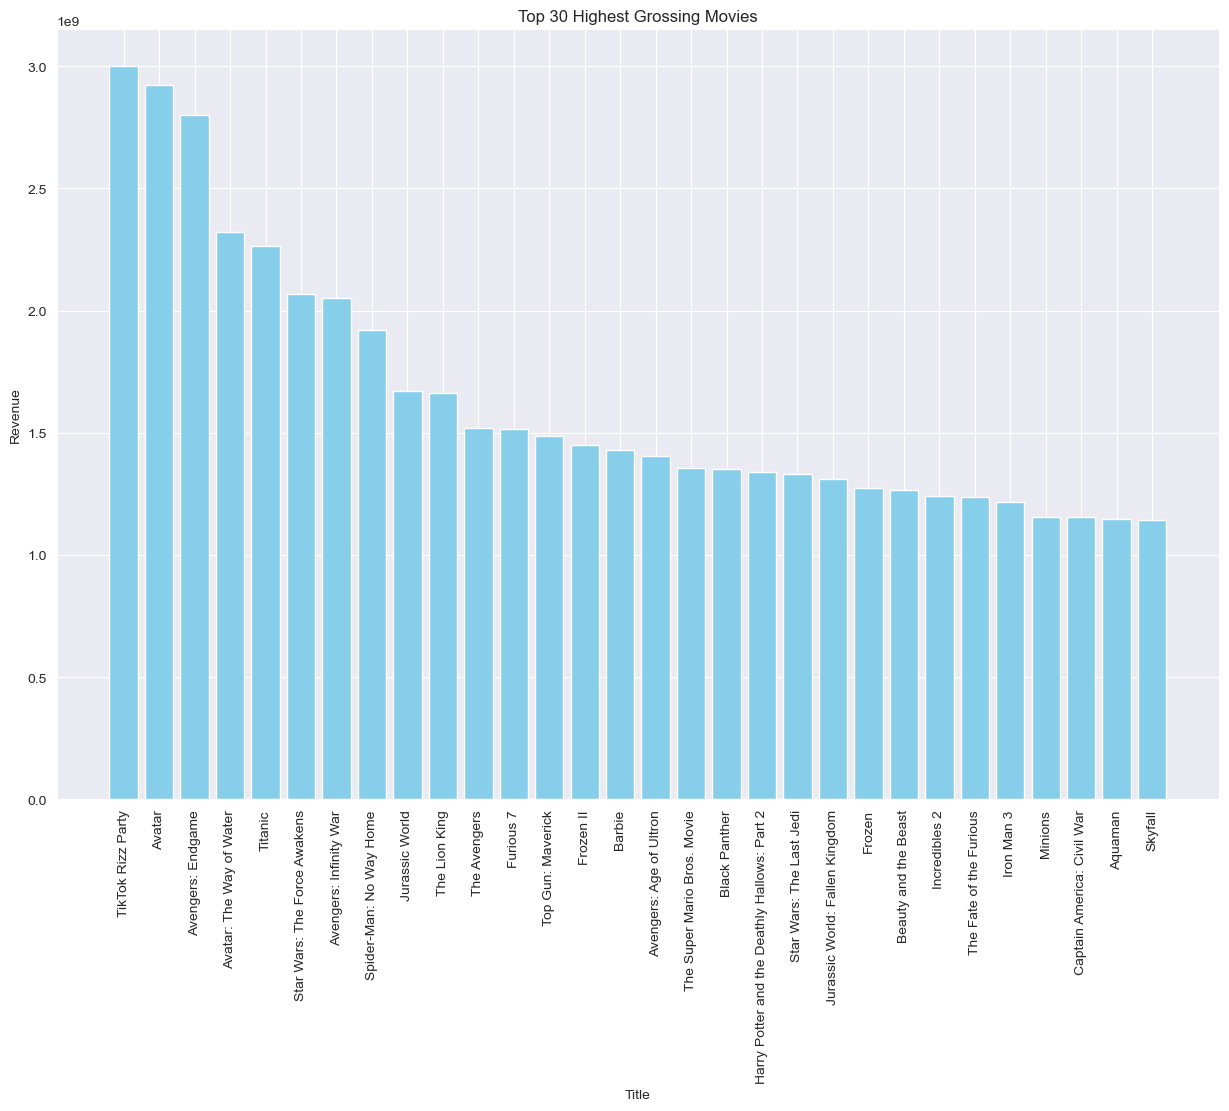

In [20]:
top_30 = df_cleaned.sort_values(by='revenue', ascending=False).head(30)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

ax.bar(top_30['title'], top_30['revenue'], color='skyblue')
plt.title('Top 30 Highest Grossing Movies')
plt.xlabel('Title')
plt.ylabel('Revenue')
plt.xticks(rotation=90)

plt.show()

Let's analyse all the statistics of the revenue

In [21]:
df_cleaned['revenue'].describe()

count    9.803000e+03
mean     6.771346e+07
std      1.608460e+08
min      1.000000e+00
25%      1.446156e+06
50%      1.301569e+07
75%      6.007056e+07
max      3.000000e+09
Name: revenue, dtype: float64

Text(0.5, 1.0, 'Revenue Distribution')

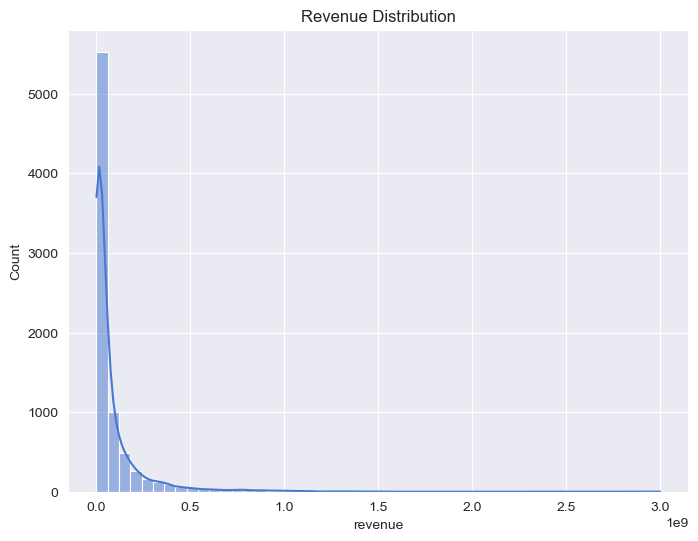

In [93]:
plt.figure(figsize=(8,6))
sns.histplot(df_cleaned['revenue'], kde=True, bins=50)
plt.title('Revenue Distribution')

<Axes: title={'center': 'Revenue Histogram'}, ylabel='Frequency'>

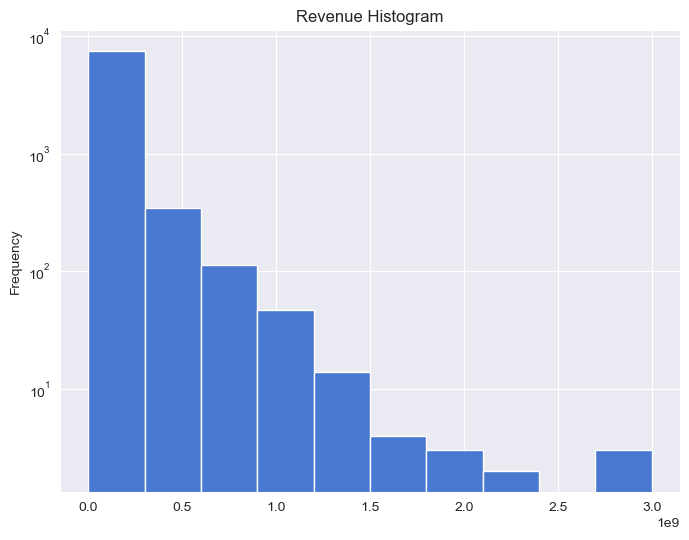

In [95]:
plt.figure(figsize=(8,6))
plt.title('Revenue Histogram')
df_cleaned['revenue'].plot(logy=True, kind='hist')

The revenue is extremely skewed to the right. The mean of the revenue is 6.771346e+07 whereas the minimum value of revenue is just $1. This seems to be an anomoly in the dataset and we should remove this. There seem to be movies with single digit revenues. Let's remove all movies with less than $500,000 in revenue.

In [23]:
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['revenue'] < 500000].index)

In [24]:
df_cleaned.shape[0]

7967

Let's see how revenue has changed over the years by looking at the maximum revenues of the best movies of that year.

<Axes: title={'center': 'Maximum Revenue Over Years'}, xlabel='year'>

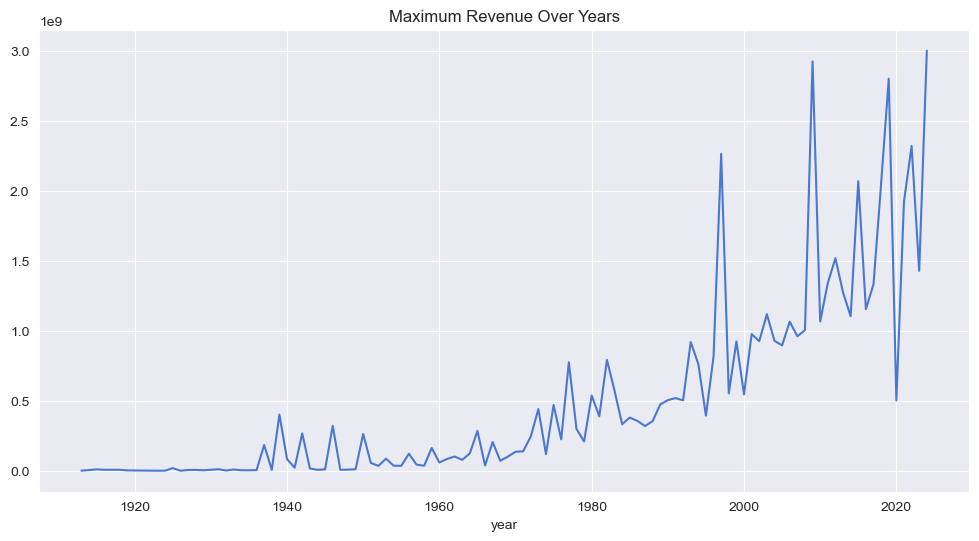

In [101]:
plt.figure(figsize=(12,6))
plt.title('Maximum Revenue Over Years')
avg_revenue_per_year = df_cleaned.groupby('year')['revenue'].max()
avg_revenue_per_year.plot()

As expected, over the years, there has been a gradual increase in revenue as more and more people internationally go to see movies. There is also a sharp decrease in 2020 and can be explained by COVID-19. 

Now, we are left with 7967 movies.

### Budget Analysis

In [58]:
df_cleaned['budget'].describe()

count    7.967000e+03
mean     2.874737e+07
std      4.086649e+07
min      1.000000e+00
25%      4.500000e+06
50%      1.480000e+07
75%      3.500000e+07
max      4.600000e+08
Name: budget, dtype: float64

Text(0.5, 1.0, 'Budget Distribution')

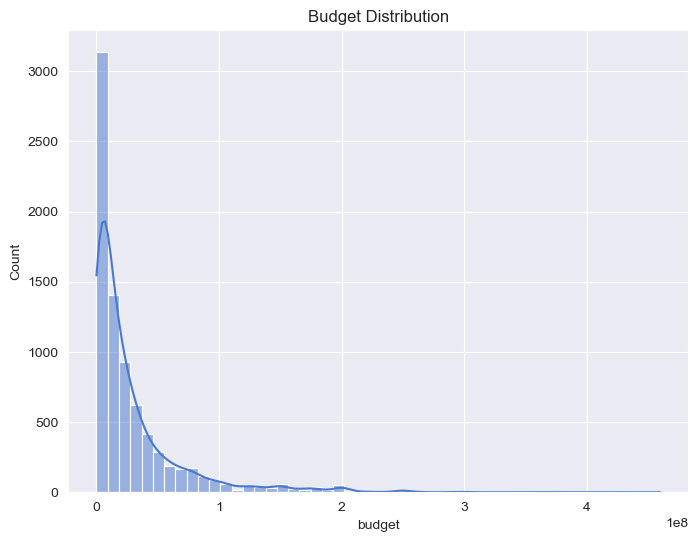

In [76]:
plt.figure(figsize=(8,6))
sns.histplot(df_cleaned['budget'], kde=True, bins=50)
plt.title('Budget Distribution')

<Axes: title={'center': 'Budget Histogram'}, ylabel='Frequency'>

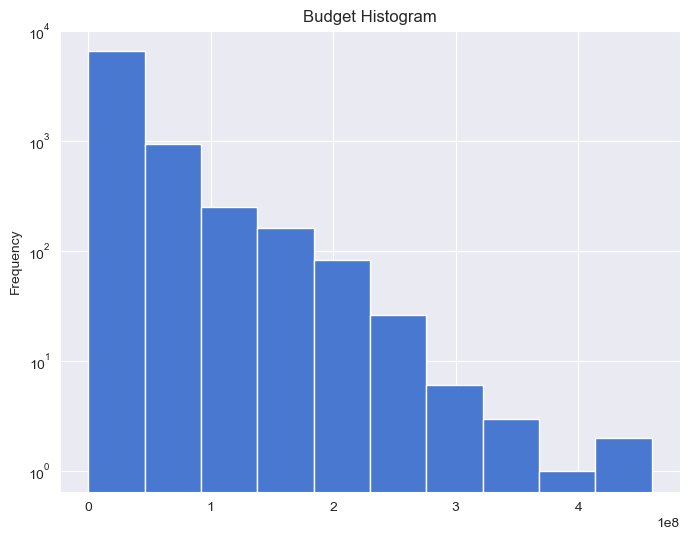

In [78]:
plt.figure(figsize=(8,6))
plt.title('Budget Histogram')
df_cleaned['budget'].plot(logy=True, kind='hist')

The budget is rightly skewed. Approximately more than 75% of the movies in the dataset have a budget less than 30 million dollars.

Let's take a look at the most movies. 

In [81]:
df_cleaned[['title', 'budget', 'revenue', 'return','year']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue,return,year
282,Avatar: The Way of Water,460000000.0,2.320250e+09,5.044022,2022
30156,Lost in the Stars,417549000.0,3.340392e+08,0.800000,2023
153,Pirates of the Caribbean: On Stranger Tides,379000000.0,1.045714e+09,2.759139,2011
23,Avengers: Age of Ultron,365000000.0,1.405404e+09,3.850421,2015
15,Avengers: Endgame,356000000.0,2.800000e+09,7.865169,2019
1110,Fast X,340000000.0,7.047097e+08,2.072675,2023
6,Avengers: Infinity War,300000000.0,2.052415e+09,6.841383,2018
178,Justice League,300000000.0,6.579270e+08,2.193090,2017
1520,The Flash,300000000.0,2.683756e+08,0.894585,2023
146,Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08,3.203333,2007


Does budget have any correlation to revenue? 

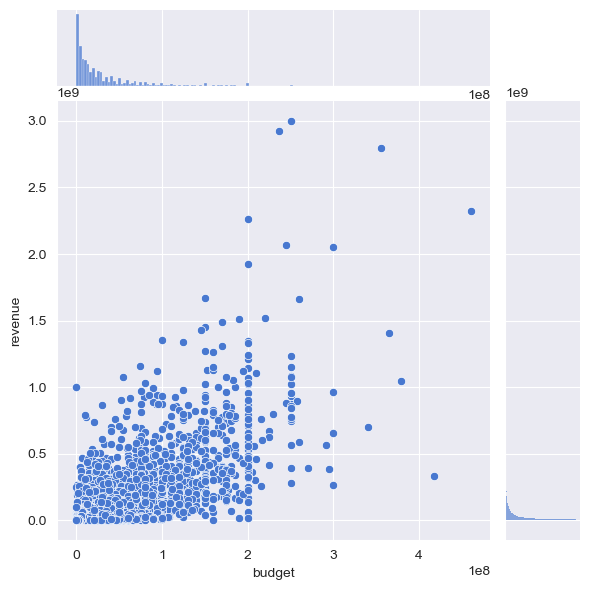

In [84]:
sns.jointplot(x='budget',y='revenue',data=df_cleaned[df_cleaned['return'].notnull()])

In [88]:
import scipy.stats as stat

pearsonr = stat.pearsonr(x=df_cleaned['budget'], y=df_cleaned['revenue'])
pearsonr

PearsonRResult(statistic=0.7279637951329886, pvalue=0.0)

Unsurpisingly, the larger the budget, the more revenue the movie makes because the movies that have large budgets are usually blockbusters which are highly anticipated by audiences.

Let's see whether budget has a relationship with return.

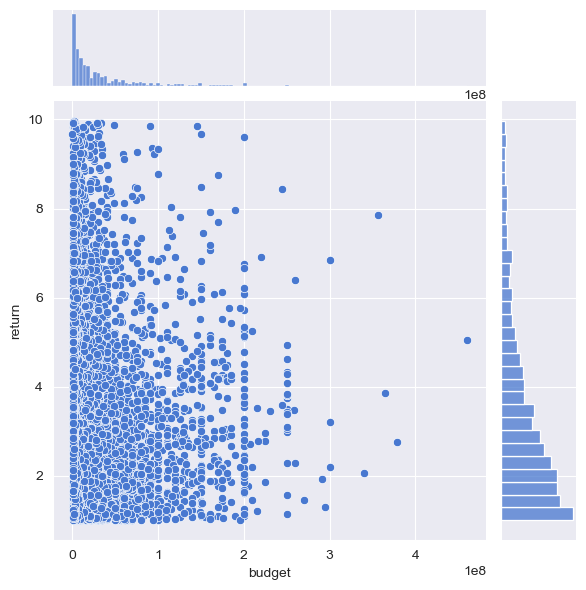

In [87]:
sns.jointplot(x='budget',y='return',data=df_cleaned[(df_cleaned['return'].notnull()) & (df_cleaned['return'] < 10) & (df_cleaned['return'] > 1)])

In [89]:
import scipy.stats as stat

pearsonr = stat.pearsonr(x=df_cleaned['budget'], y=df_cleaned['return'])
pearsonr

PearsonRResult(statistic=-0.007928167002960888, pvalue=0.47922299334150037)

In contrast to budget and revenue, there is no relationship between budget and return. This implies that quite obviously in this day in age, more expensive movies do not necessarily perform well and often do not make a profit. 

### Popularity Analysis

In [25]:
df_cleaned['popularity'].describe()

count    7967.000000
mean       22.959496
std        68.523045
min         0.000000
25%        10.060500
50%        15.154000
75%        23.093500
max      2994.357000
Name: popularity, dtype: float64

<Axes: title={'center': 'Popularity Histogram'}, ylabel='Frequency'>

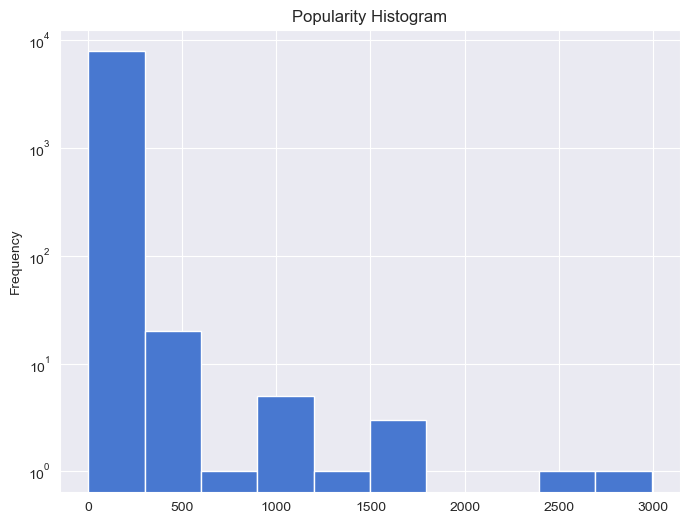

In [90]:
plt.figure(figsize=(8,6))
plt.title('Popularity Histogram')
df_cleaned['popularity'].plot(logy=True, kind='hist')

The distribution of popularity score is also extremely skewed. 

In [27]:
df_cleaned[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)

,title,popularity,year
3871,Blue Beetle,2994.357,2023
5052,Gran Turismo,2680.593,2023
7921,The Nun II,1692.778,2023
2131,Meg 2: The Trench,1567.273,2023
9968,Retribution,1547.220,2023
4014,Talk to Me,1458.514,2023
1110,Fast X,1175.267,2023
6397,Sound of Freedom,1111.036,2023
825,Barbie,1069.340,2023
1799,Elemental,1008.942,2023


The top 10 most popular movies all came out in 2023. Blue Beetle is the most popular based on the TMDB Popularity Score. It seems as though the popularity score may not be the best indicator for how "good" a movie is.

In [28]:
df_cleaned['vote_count'].describe()

count     7967.000000
mean      1888.571984
std       3236.859550
min          0.000000
25%        178.000000
50%        681.000000
75%       2042.500000
max      34495.000000
Name: vote_count, dtype: float64

Similar to the popularity score, the distribution of vote counts is also extremely skewed with the maximum number of votes for a movie being so much more than the upper quartile.

In [29]:
df_cleaned[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,year
0,Inception,34495,2010
1,Interstellar,32571,2014
2,The Dark Knight,30619,2008
3,Avatar,29815,2009
4,The Avengers,29166,2012
5,Deadpool,28894,2016
6,Avengers: Infinity War,27713,2018
7,Fight Club,27238,1999
8,Guardians of the Galaxy,26638,2014
9,Pulp Fiction,25893,1994


In [30]:
df_cleaned['vote_average'].describe()

count    7967.000000
mean        6.451094
std         0.980770
min         0.000000
25%         5.959500
50%         6.510000
75%         7.068000
max        10.000000
Name: vote_average, dtype: float64

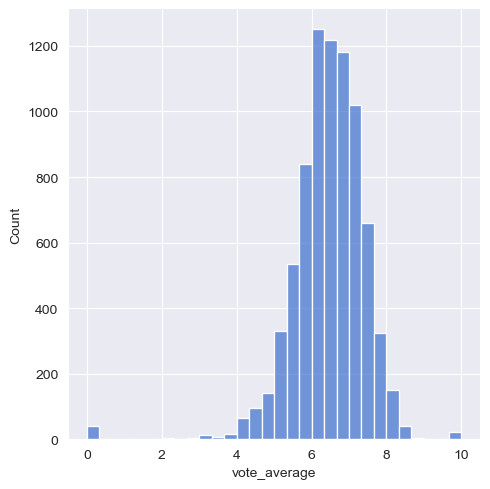

In [31]:
sns.displot(df_cleaned['vote_average'], bins=30)

The distribution of vote average is relatively normally distributed with most movies being rated between 5 to 8. The mean rating is 6.45. Let's see what the most upvoted movies are. However, we will only cosider those with more than 5000 votes (similar to IMDB's criteria).

In [32]:
df_cleaned[df_cleaned['vote_count'] > 5000][['title', 'vote_average', 'vote_count', 'year']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,year
53,The Godfather,8.707,18677,1972
14,The Shawshank Redemption,8.702,24649,1994
215,The Godfather Part II,8.591,11293,1974
119,Schindler's List,8.573,14594,1993
436,12 Angry Men,8.540,7658,1957
107,Spirited Away,8.539,14913,2001
81,Parasite,8.515,16430,2019
2,The Dark Knight,8.512,30619,2008
93,The Green Mile,8.507,15937,1999
9,Pulp Fiction,8.488,25893,1994


The Shawshank Redemption and The Godfather are the two most critically acclaimed movies in the dataset. Even though they are the two most highest rated movies, they are not even in the top 10 most popular movies in the dataset. Let's examine the relationship between vote_average and popularity.

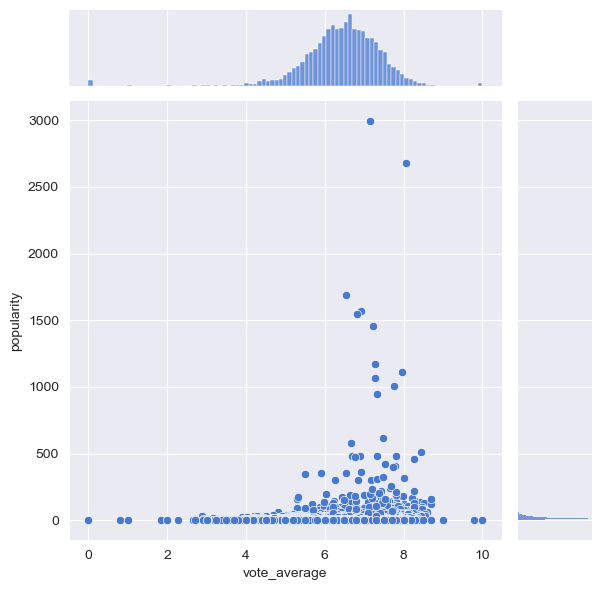

In [33]:
sns.jointplot(data=df_cleaned, x='vote_average', y='popularity')

In [34]:
import scipy.stats as stat

pearsonr = stat.pearsonr(x=df_cleaned['vote_average'], y=df_cleaned['popularity'])
pearsonr

PearsonRResult(statistic=0.11320432173783711, pvalue=3.8477071489653705e-24)

The Pearson Coefficient of the vote average and popularity is only 0.11 which suggests that there is no correlation between the two features. 

### Movie Release Dates
Let's investigate whether the release dates of movies affected their performance. We can also look at years where movies were particularly popular.

In [35]:
import datetime

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

def get_month(x):
    return months[int(str(x).split('-')[1]) - 1]
def get_day(x):
    year, month, day = (int(i) for i in x.split('-'))
    answer = datetime.date(year, month, day).weekday()
    return days[answer]
    

In [36]:
df_cleaned['day'] = df_cleaned['release_date'].apply(get_day)
df_cleaned['month'] = df_cleaned['release_date'].apply(get_month)

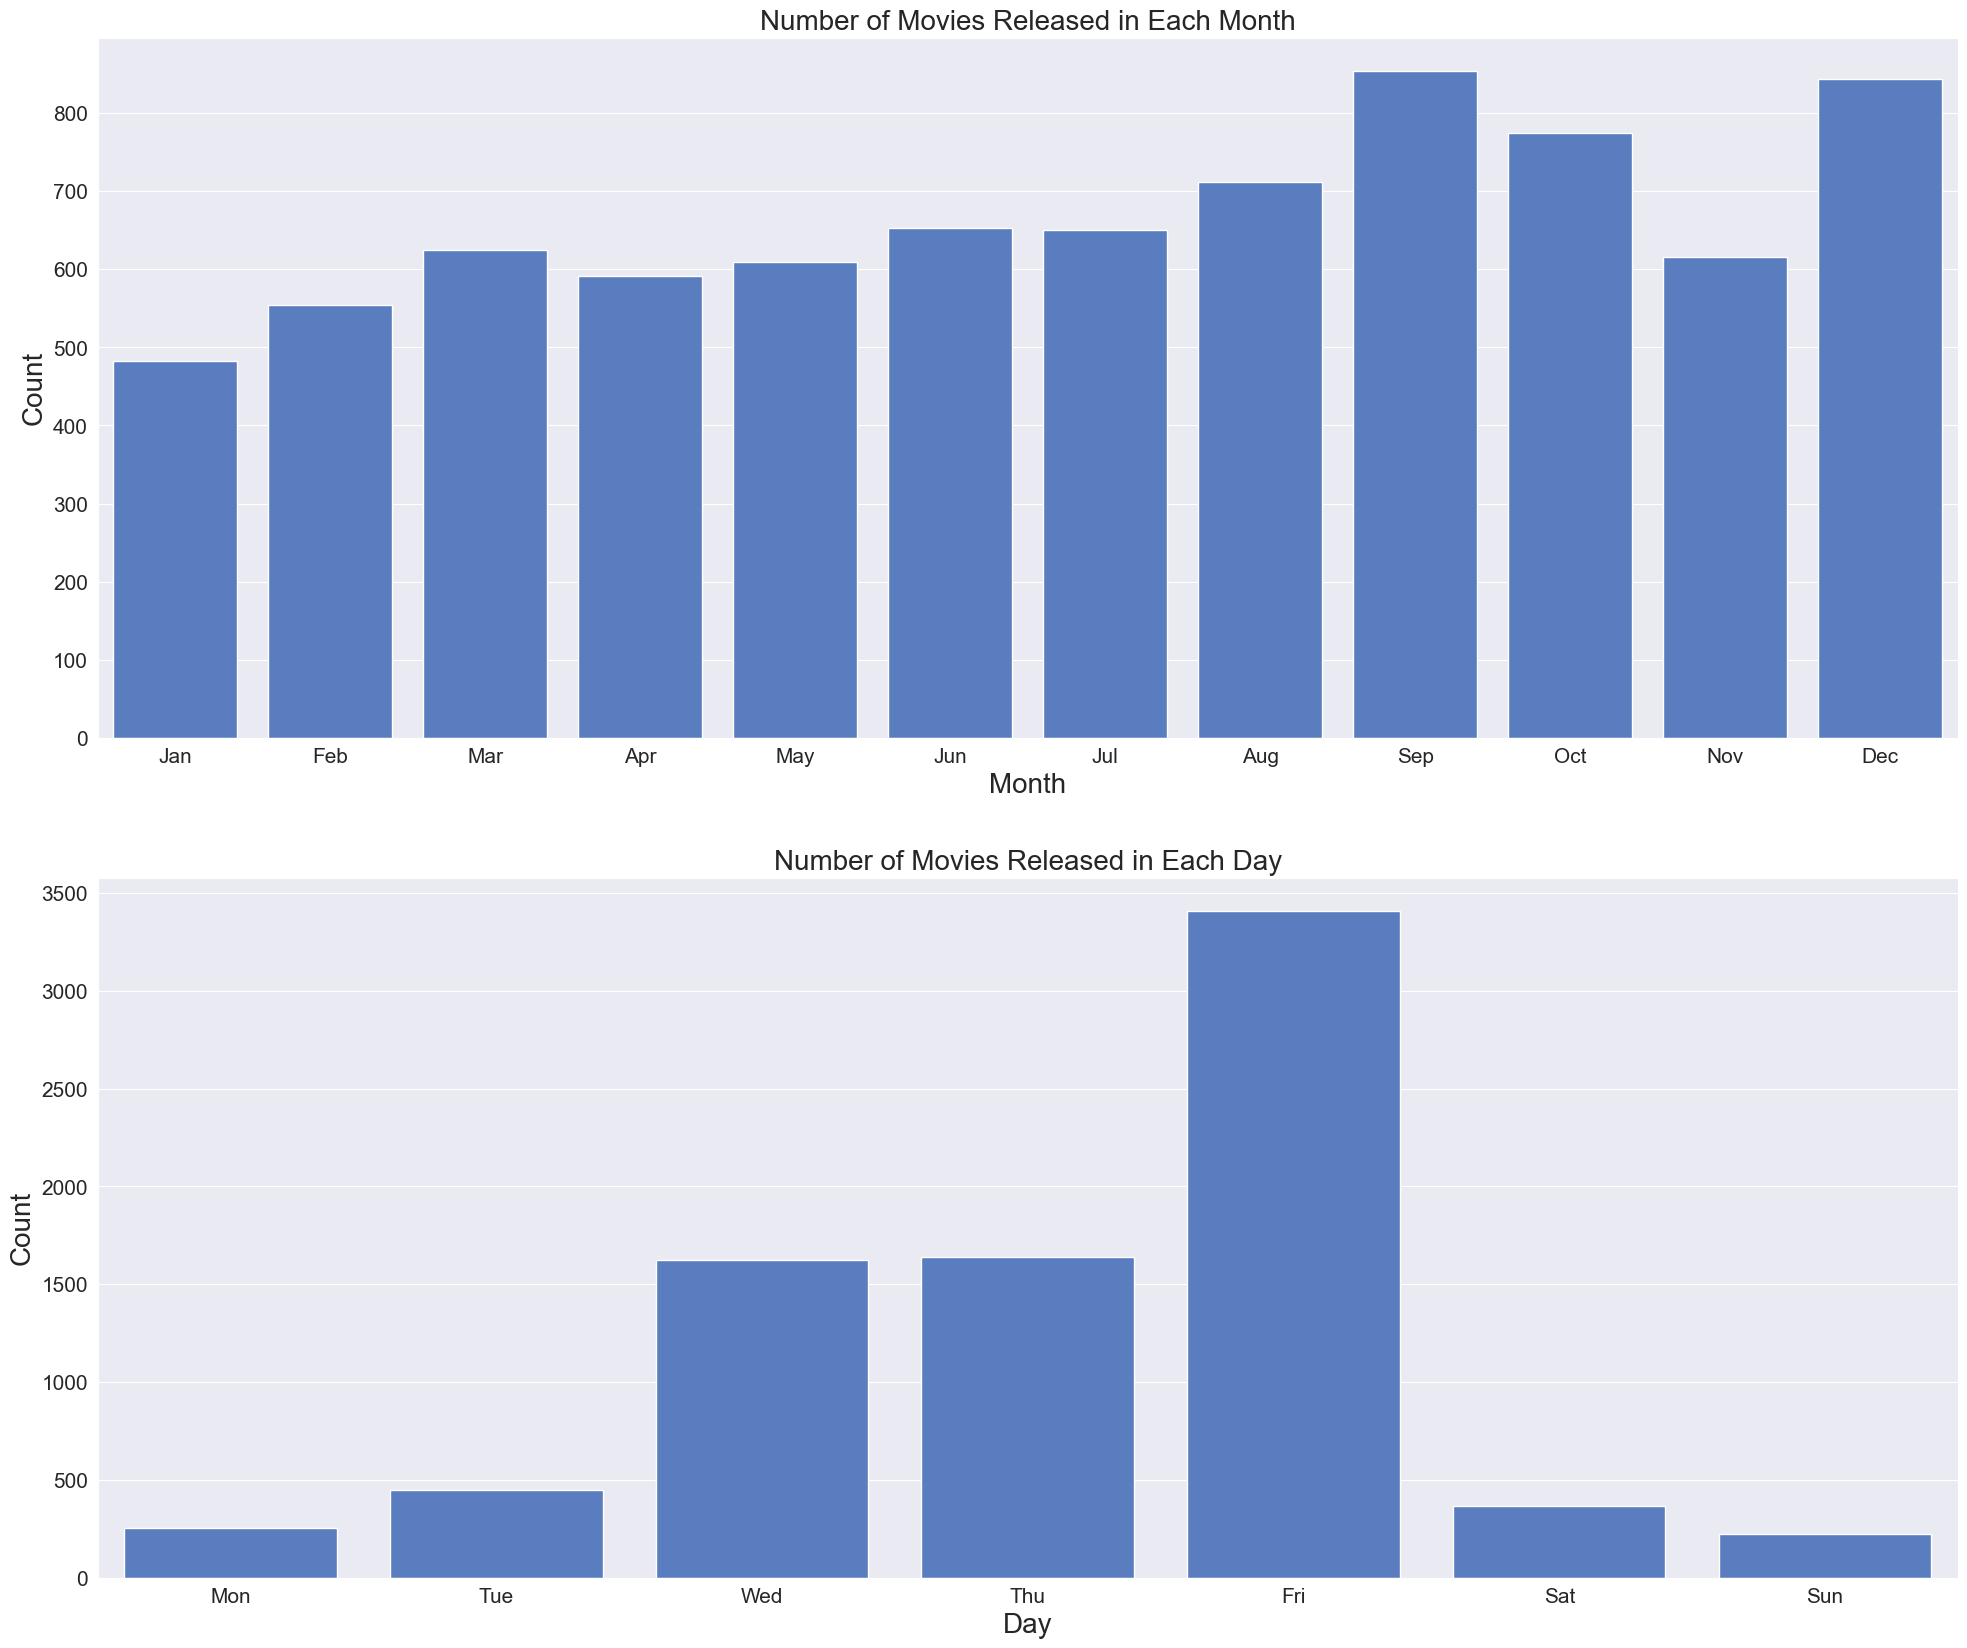

In [37]:
fig, ax = plt.subplots(2, 1, figsize=(24, 20))

# Number of Movies Released Each Month
ax[0].set_title('Number of Movies Released in Each Month', size=20)
ax[0].set_xlabel('Month', size=20)
ax[0].set_ylabel('Count', size=20)
ax[0].tick_params(labelsize=15)
sns.countplot(x='month', data=df_cleaned, ax=ax[0], order=months)

# Number of Movies Released Each Day
ax[1].set_title('Number of Movies Released in Each Day', size=20)
ax[1].set_xlabel('Day', size=20)
ax[1].set_ylabel('Count', size=20)
ax[1].tick_params(labelsize=15)
sns.countplot(x='day', data=df_cleaned, ax=ax[1], order=days)

plt.show()



The most popular months to release movies are September and December. The most popular day by far to release movies is Friday, which is understandable as Friday is the beginning of the weekend. Let's now analyse the average gross revenues for blockbuster movies in each month (those that made more than $100 million in revenue).

<Axes: title={'center': 'Average Gross Revenue By Month for Blockbuster Movies'}, xlabel='mon', ylabel='revenue'>

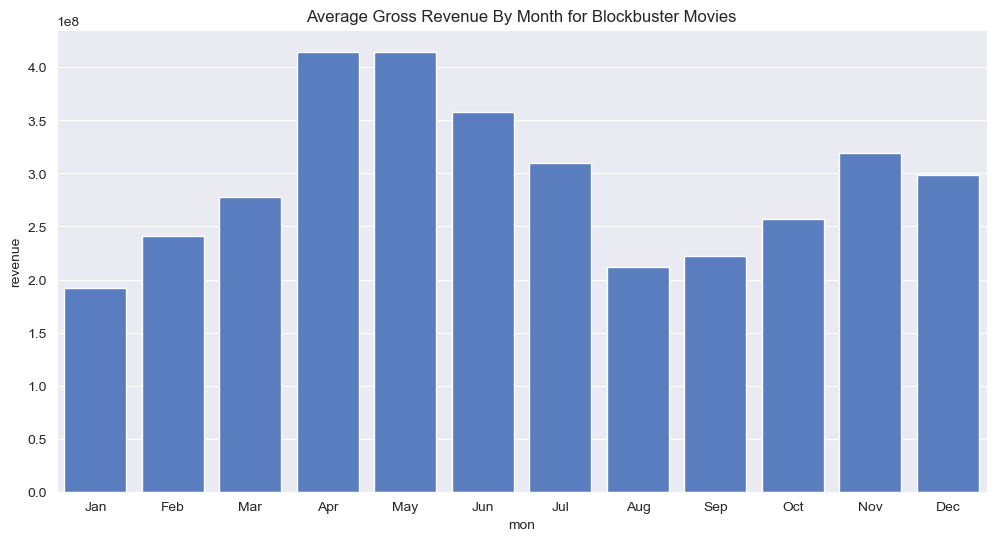

In [38]:
month_revenue_avg = pd.DataFrame(df_cleaned[df_cleaned['revenue'] > 1e8].groupby('month')['revenue'].mean())
month_revenue_avg['mon'] = month_revenue_avg.index
plt.figure(figsize=(12,6))
plt.title('Average Gross Revenue By Month for Blockbuster Movies')
sns.barplot(x='mon', y='revenue', data=month_revenue_avg, order=months)

We can see that April and May have the highest gross average among the blockbuster movies. This can be explained by the fact that blockbuster movies are usually released in the summer.

(0.0, 14.0)

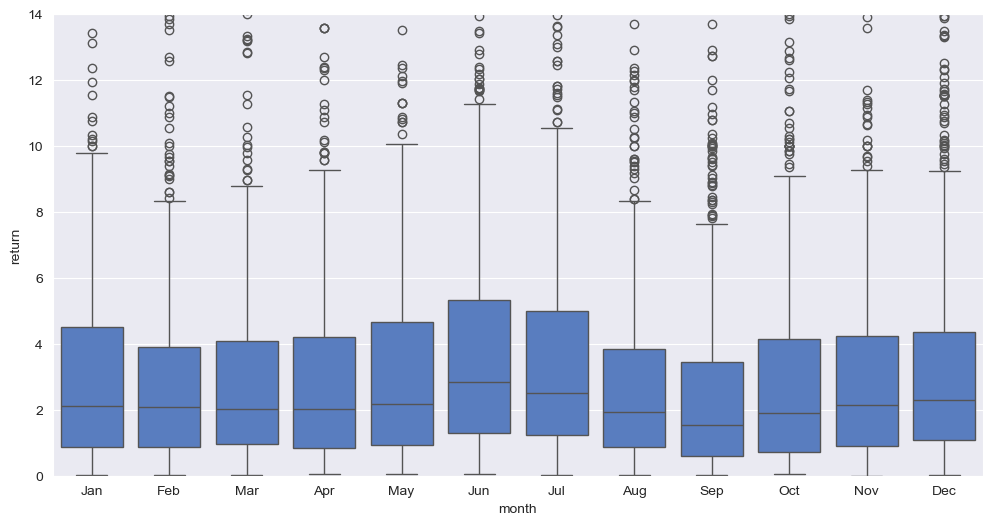

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='return', data=df_cleaned, order=months)
plt.ylim([0, 14])

June and July have yielded the highest median returns. September is the least successful month based on returns. We can also see the trend of movies during the summer performing better.

<Axes: title={'center': 'Cumulative Number of Movies Over the Years'}, xlabel='year'>

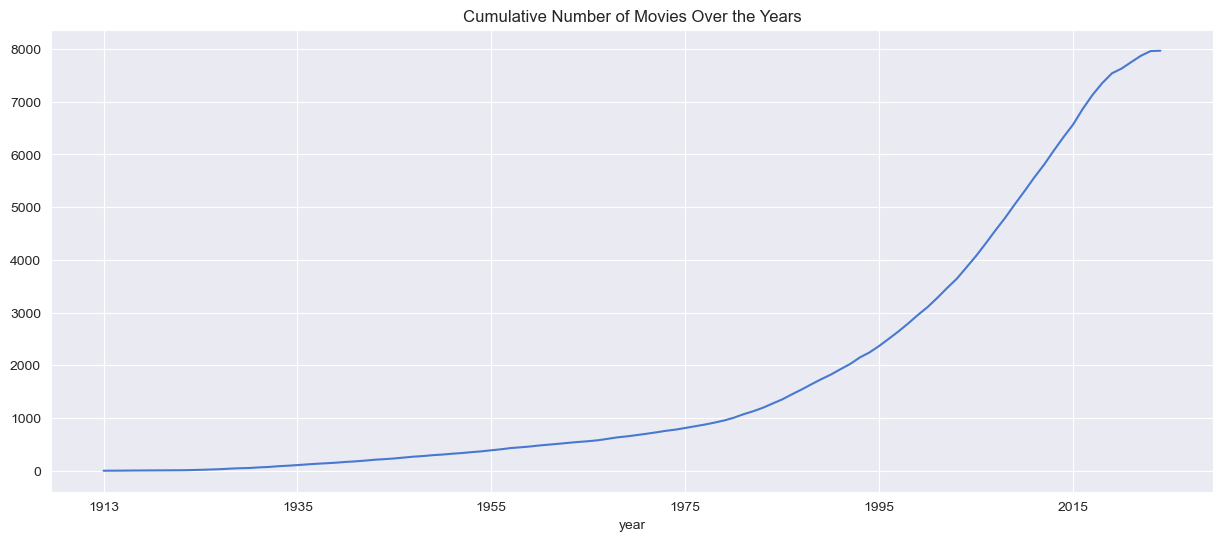

In [40]:
year_count = df_cleaned.groupby('year')['title'].count().cumsum()
plt.figure(figsize=(15,6))
plt.title('Cumulative Number of Movies Over the Years')
year_count.plot()

There was a rapid increase in the number of movies starting from the 1980s then the rate of increase slowly decreases from 2017. This could be due to the sampling techniques of the dataset and therefore is not so significant. However, we should take into account the low number of movies from the very early years (before 1975).

In [41]:
df_cleaned[['title', 'year']].sort_values('year').head(10)

,title,year
54260,Traffic in Souls,1913
823081,Neptune's Daughter,1914
6585,The Birth of a Nation,1915
8945,Intolerance: Love's Struggle Throughout the Ages,1916
28601,"20,000 Leagues Under the Sea",1916
57362,Mickey,1918
233150,The Miracle Man,1919
827855,Over the Hill to the Poorhouse,1920
2301,The Kid,1921
7047,Safety Last!,1923


The oldest movie is Traffic in Souls. Traffic in Souls is a story about a woman looking for her kidnapped sister who was forced into prostitution by a philanthropist. Interesting!

Let's now take a look at a heatmap to display movie releases by year in the 21st century. This will give us a good indication of the most exciting times for movies.

In [42]:
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

In [43]:
df_cleaned['year'].astype(int)

0          2010
1          2014
2          2008
3          2009
4          2012
           ... 
927222     1998
964402     2012
964404     2012
1025013    2017
1086429    2020
Name: year, Length: 7967, dtype: int64

In [44]:
df_cleaned['year'] = pd.to_numeric(df_cleaned['year'], errors='coerce')
df_21 = df_cleaned[df_cleaned['year'] >= 2000]

<Axes: xlabel='year', ylabel='month'>

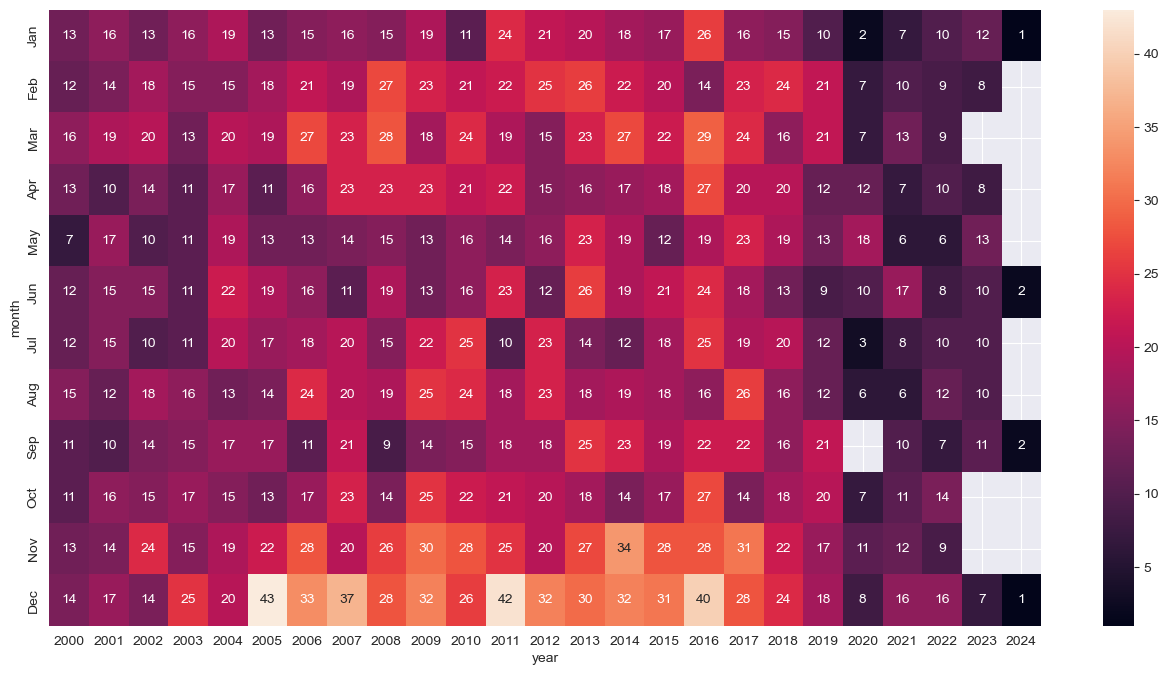

In [45]:
heatmap = pd.pivot_table(data=df_21, index='month', columns='year', aggfunc='count', values='title')
plt.figure(figsize=(16,8))
sns.heatmap(heatmap, annot=True, yticklabels=months, fmt='n')

### Runtime

In [46]:
df_cleaned['runtime'].describe()

count    7967.000000
mean      110.466801
std        26.478697
min         0.000000
25%        95.000000
50%       106.000000
75%       121.000000
max       999.000000
Name: runtime, dtype: float64

The average runtime of the movies in this dataset is about 110 minutes. The shortest is apparently 0 minutes long and the longest is 999 minutes long. 

In [47]:
df_cleaned['runtime'] = df_cleaned['runtime'].astype(float)

<Axes: title={'center': 'Runtime Distribution'}, xlabel='runtime', ylabel='Count'>

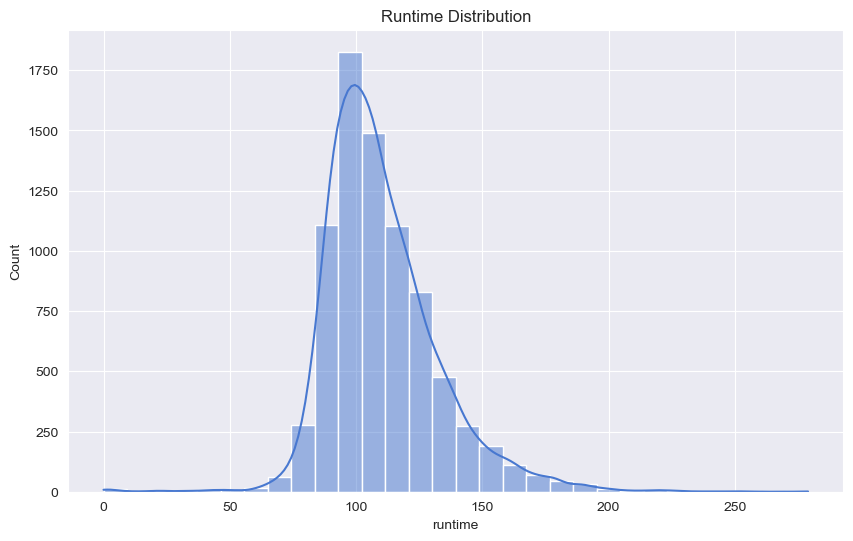

In [48]:
runtime_300 = df_cleaned[df_cleaned['runtime'] < 300]

plt.figure(figsize=(10,6))
plt.title('Runtime Distribution')
sns.histplot(runtime_300['runtime'], kde=True, bins=30)

The distribution of runtime is relatively normal with the most common runtimes across movies within 80-125 minutes.

Let's investigate the relationship between a movie's runtime and its return.

In [51]:
df_run_ret = df_cleaned[(df_cleaned['return'].notnull()) & (df_cleaned['return'] < 10) & (df_cleaned['runtime'] > 0)]

<Figure size 1200x600 with 0 Axes>

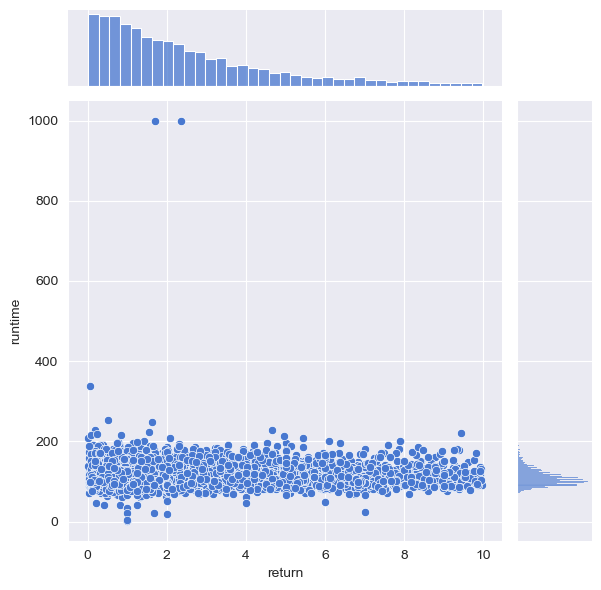

In [56]:
plt.figure(figsize=(12,6))
sns.jointplot(data=df_run_ret, x='return', y='runtime')

In [57]:
import scipy.stats as stat

pearsonr = stat.pearsonr(x=df_cleaned['runtime'], y=df_cleaned['return'])
pearsonr

PearsonRResult(statistic=-0.0455138245184603, pvalue=4.825044071550506e-05)

From the jointplot, there is no clear relationship between runtime and return. This is further emphasised by its pearson R value of -0.046.

Let's now explore whether there is a relationship between budget and runtime.

In [59]:
df_run_bud = df_cleaned[(df_cleaned['budget'].notnull()) & (df_cleaned['budget'] > 1) & (df_cleaned['runtime'] > 0)]

<Figure size 1200x600 with 0 Axes>

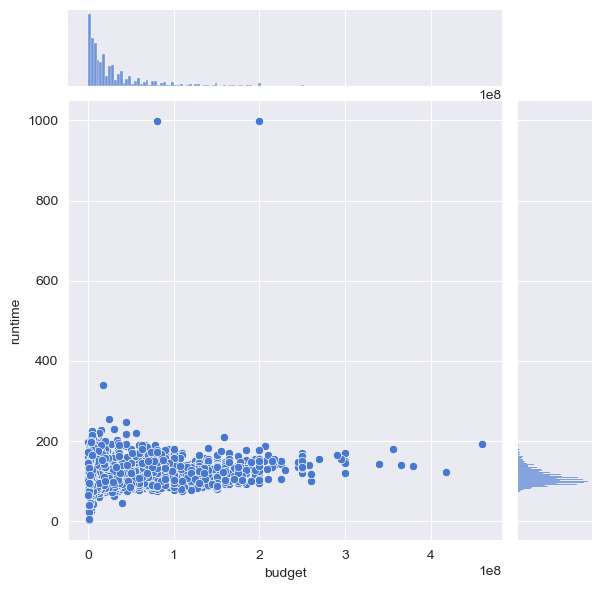

In [63]:
plt.figure(figsize=(12,6))
sns.jointplot(data=df_run_ret, x='budget', y='runtime')

In [64]:
import scipy.stats as stat

pearsonr = stat.pearsonr(x=df_cleaned['runtime'], y=df_cleaned['budget'])
pearsonr

PearsonRResult(statistic=0.18841719726196546, pvalue=1.4338968876174239e-64)

From the budget and runtime jointplot, there seems to be a small relationship between the two features. The smaller the budget, the shorter the runtime. However, this is not a strong relationship. However, most movies seem to be under the 200 minute runtime.

Let's see how runtimes have evolved over the years.

Text(0, 0.5, 'Runtime (Minutes)')

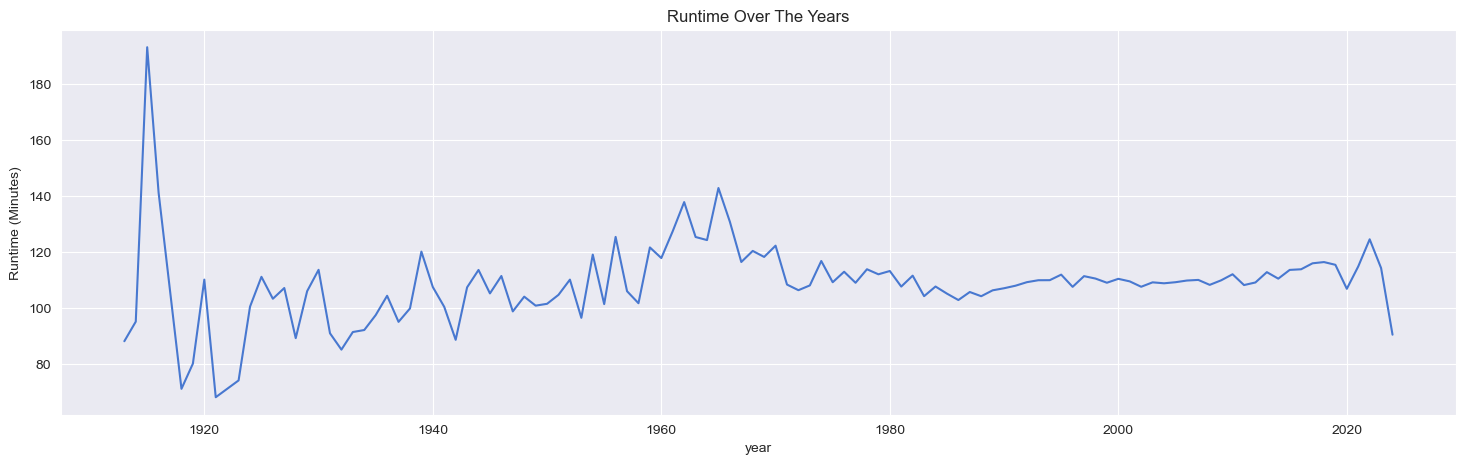

In [67]:
plt.figure(figsize=(18,5))
avg_runtime_per_year = df_cleaned.groupby('year')['runtime'].mean()
avg_runtime_per_year.plot()
plt.title('Runtime Over The Years')
plt.ylabel('Runtime (Minutes)')

The runtime has seen a gradual increase between 1920 and 1965 from 60 minutes to its peak of just over 140 minutes then saw a small decrease in the 70s and stayed relatively constant at around the 110 minute mark until 2020 where there was a sharp increase to over 120 minutes then back down.

### Genres Analysis

In [129]:
genres_list = []

for genre in df_cleaned['genres'].values:
    genres_list.append(genre)

genres = [genre.strip() for sublist in genres_list for genre in sublist.split(',')]
genre_df = pd.DataFrame(genres)
value_counts = pd.DataFrame(genre_df.value_counts())

In [130]:
genre_counts = value_counts.reset_index()
genre_counts.columns = ['Genre', 'Movies']
genre_counts

,Genre,Movies
0,Drama,3653
1,Comedy,2870
2,Action,2004
3,Thriller,1972
4,Romance,1544
5,Adventure,1466
6,Crime,1246
7,Horror,873
8,Science Fiction,856
9,Family,852


In [131]:
genre_counts.value_counts().shape[0]

19

There are 19 different genres in this dataset. The most common genre is Drama. The second and third most are Comedy and Action.

Let's now investigate how the genres have changed over the years. 

In [134]:
genres = ['Drama', 'Comedy', 'Action', 'Thriller', 'Romance', 'Adventure', 'Crime', 'Horror', 'Science Fiction', 'Fantasy', 'Animation', 'History']

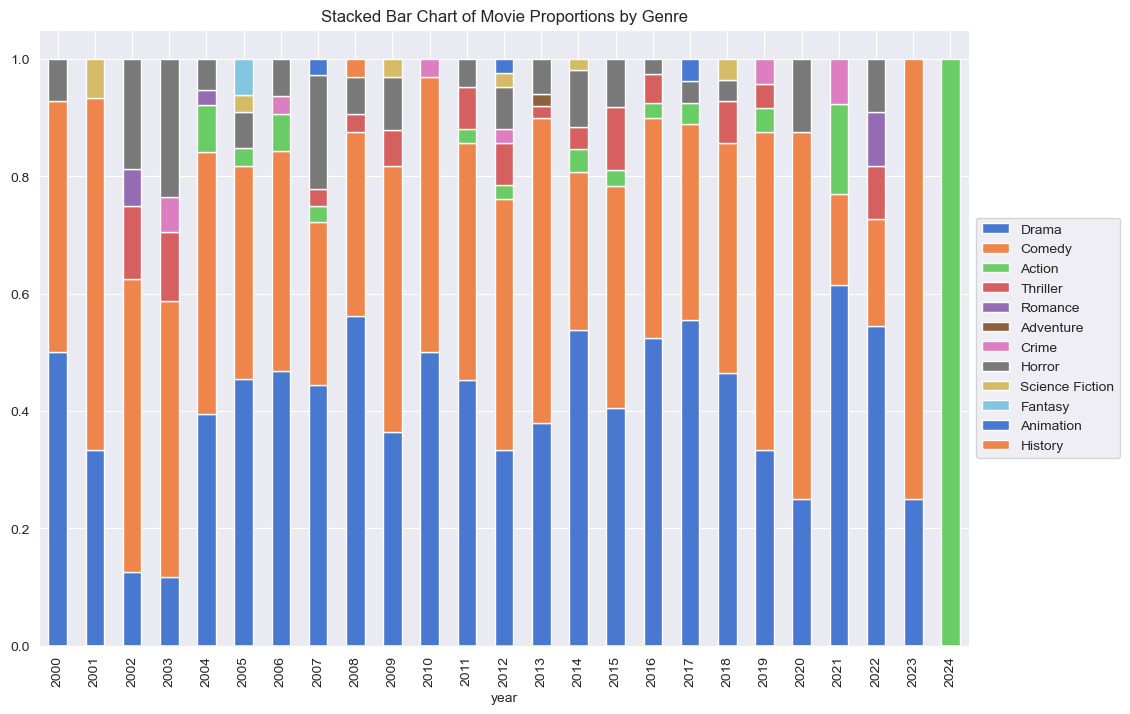

In [138]:
genres_21 = df_cleaned[(df_cleaned['genres'].isin(genres)) & (df_cleaned['year'] >= 2000)]
crosstab = pd.crosstab([genres_21['year']], genres_21['genres']).apply(lambda x: x/x.sum(), axis=1)
crosstab[genres].plot(kind='bar', stacked=True, figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Stacked Bar Chart of Movie Proportions by Genre")
plt.show()

Visibily, the two prevalent genres across most of the years are Drama and Comedy.

### Preprocess Texts
Before we analyse the overviews, genres and keywords of the movies in our dataset, we need to clean the texts to un-capitalise them and remove any special characters.

In [40]:
df_cleaned['title'] = df_cleaned['title'].astype(str)
df_cleaned['overview'] = df_cleaned['overview'].astype(str)
df_cleaned['genres'] = df_cleaned['genres'].astype(str)
df_cleaned['keywords'] = df_cleaned['keywords'].astype(str)

In [41]:
import re
# Lowercase all characters in text
df_cleaned['overview'] = df_cleaned['overview'].str.lower()
# Convert all text values to strings
df_cleaned['overview'] = [str(data) for data in df_cleaned.overview]
# Regex to handle special characters
df_cleaned['overview'] = df_cleaned.overview.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))

### Overview, Genre and Keywords Wordclouds

In [42]:
overview_corpus = ' '.join(df_cleaned['overview'])
genre_corpus = ','.join(df_cleaned['genres'])
keywords_corpus = ','.join(df_cleaned['keywords'])

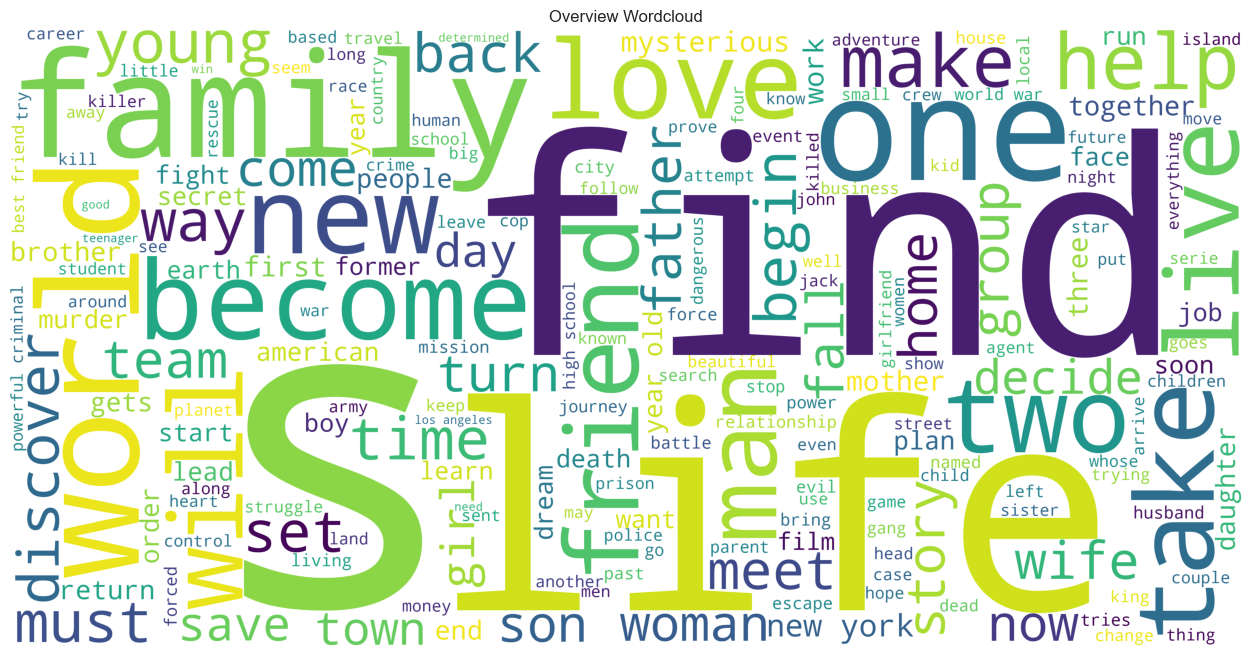

In [43]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.title('Overview Wordcloud')

plt.show()

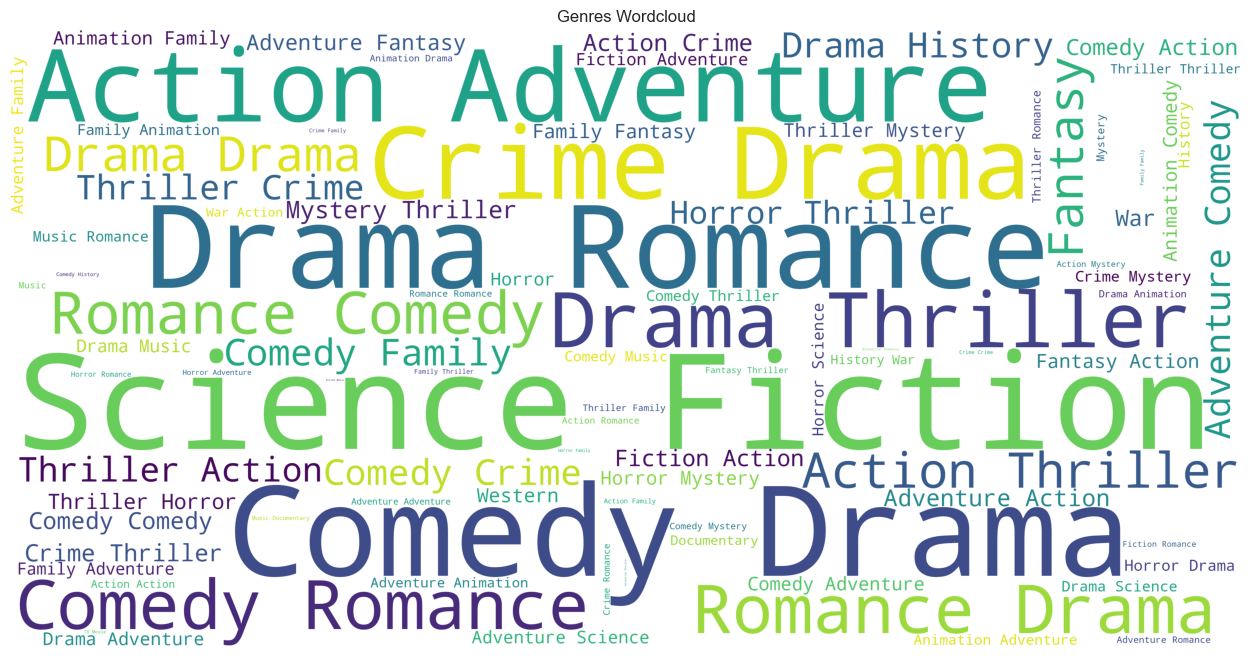

In [44]:
genres_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(genre_corpus)
plt.figure(figsize=(16,8))
plt.imshow(genres_wordcloud)
plt.axis('off')
plt.title('Genres Wordcloud')

plt.show()

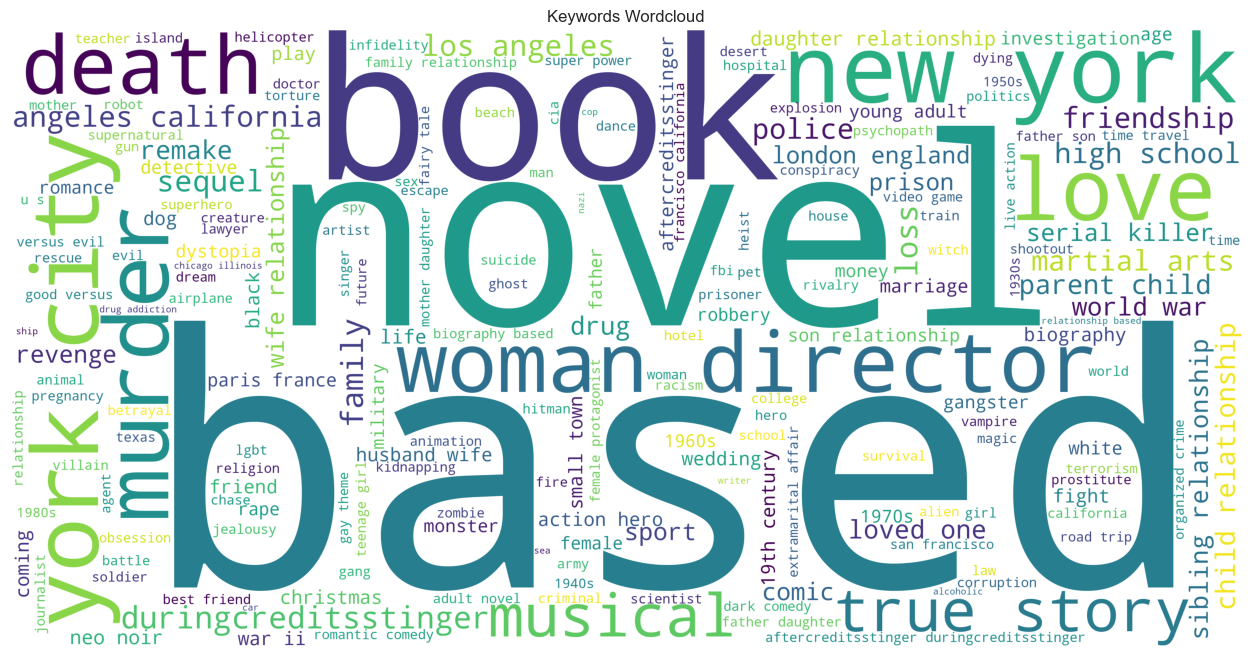

In [45]:
keywords_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(keywords_corpus)
plt.figure(figsize=(16,8))
plt.imshow(keywords_wordcloud)
plt.axis('off')
plt.title('Keywords Wordcloud')

plt.show()

#### Original Language
Let's look at the different languages of movies in our dataset

In [46]:
df_cleaned['original_language'].drop_duplicates().shape[0]

52

In [47]:
languages = pd.DataFrame(df_cleaned['original_language'].value_counts())
languages['language'] = languages.index
languages.columns = ['count', 'language']
languages.drop(columns=['language']).head(5)

,count
original_language,
en,6639
hi,216
fr,211
es,108
ja,96


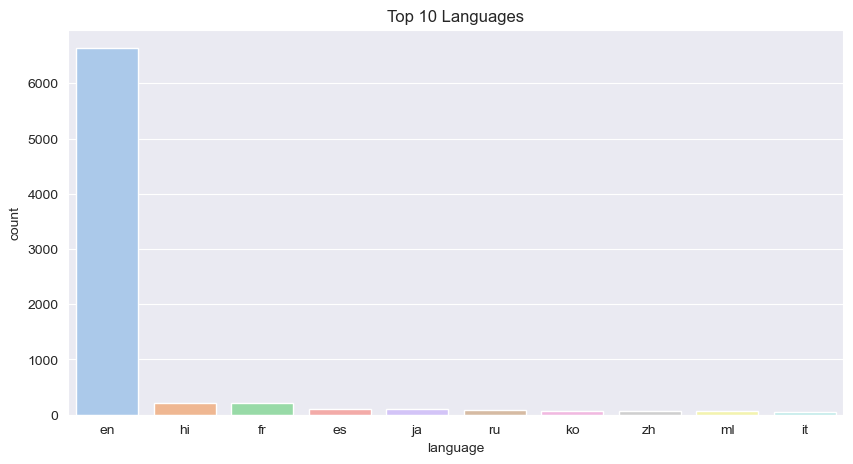

In [48]:
plt.figure(figsize=(10,5))
sns.barplot(data=languages.head(10), x='language', y='count', palette=sns.color_palette('pastel'))
plt.title('Top 10 Languages')
plt.show()

There are 65 unique original languages in our dataset. The most major language is English. The second most major languages are French and Hindi. However, they are very distant from the number of English movies.

### Exporting the cleaned dataset to CSV

In [139]:
df_cleaned.to_csv('movies_cleaned.csv', index=False)